In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load dataset




In [3]:
X_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets/Training/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 0)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Training/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append( 2)

for img in glob.glob("/content/drive/MyDrive/datasets/Training/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append(3)




# Prepare and load data Test

In [4]:
X_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets/Testing/glioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets/Testing/meningioma_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 1)


for img in glob.glob("/content/drive/MyDrive/datasets/Testing/no_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 2)

for img in glob.glob("/content/drive/MyDrive/datasets/Testing/pituitary_tumor/*.jpg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append( 3)



In [5]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D


# Building the network

In [7]:
model = Sequential()

model.add(Conv2D(128, 3, input_shape=(130,130,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(256, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))


model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [8]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 512)      0

# Split data into Train and Validation

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# train the network

In [10]:
history = model.fit( X_train, y_train, epochs = 50 ,  verbose=1 , validation_data=(X_valid , y_valid) )

Epoch 1/50
77/77 [==============================] - 18s 182ms/step - loss: 1.3322 - accuracy: 0.5379 - val_loss: 0.7615 - val_accuracy: 0.6334
Epoch 2/50
77/77 [==============================] - 13s 168ms/step - loss: 0.6485 - accuracy: 0.7212 - val_loss: 0.9681 - val_accuracy: 0.5916
Epoch 3/50
77/77 [==============================] - 13s 168ms/step - loss: 0.5275 - accuracy: 0.7811 - val_loss: 0.4242 - val_accuracy: 0.8051
Epoch 4/50
77/77 [==============================] - 13s 169ms/step - loss: 0.3648 - accuracy: 0.8479 - val_loss: 0.3227 - val_accuracy: 0.8538
Epoch 5/50
77/77 [==============================] - 13s 168ms/step - loss: 0.2900 - accuracy: 0.8877 - val_loss: 0.3150 - val_accuracy: 0.8840
Epoch 6/50
77/77 [==============================] - 13s 169ms/step - loss: 0.2125 - accuracy: 0.9159 - val_loss: 0.3223 - val_accuracy: 0.9072
Epoch 7/50
77/77 [==============================] - 13s 169ms/step - loss: 0.1604 - accuracy: 0.9340 - val_loss: 0.2807 - val_accuracy: 0.9026

# plot the loss and accuracy of the model over the training and validation data during training

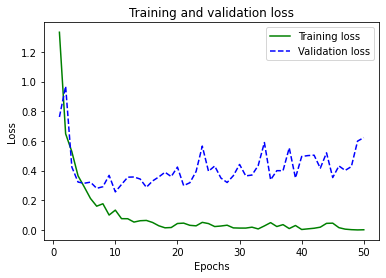

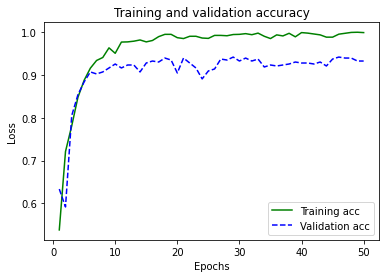

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='green', label='Training loss')
plt.plot(epochs, val_loss, color='blue', linestyle='dashed', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', linestyle='dashed', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()


# train & test loss and accuracy

In [12]:
score = model.evaluate(X_train , y_train, verbose=0)

print('Train loss:', score[0])
print('Train accuracy: ', score[1]*100.0 ,'%')

Train loss: 0.0010678338585421443
Train accuracy:  99.95899796485901 %


In [13]:
score = model.evaluate(X_test , y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0 ,'%')

Test loss: 5.660799026489258
Test accuracy:  74.36548471450806 %
